In [3]:
# code cell 0
# imports

import cv2
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
from transformers import pipeline
from gtts import gTTS
from playsound import playsound
from IPython.display import Audio

In [ ]:
# code cell 1
# processes the video and converts it into images


# Read the video from specified path
cam = cv2.VideoCapture("/content/drive/MyDrive/Colab Notebooks/cv/video2.mp4")
#cam = cv2.VideoCapture("video2.mp4")

try:

    # creating a folder named data
    if not os.path.exists('data'):
        os.makedirs('data')

# if not created then raise error
except OSError:
    print ('Error: Creating directory of data')

# frame
currentframe = 0

while(True):

    # reading from frame
    ret,frame = cam.read()

    if ret:
        # if video is still left continue creating images
        name = './data/frame' + str(currentframe) + '.jpg'
        print ('Creating...' + name)

        # writing the extracted images
        cv2.imwrite(name, frame)

        # increasing counter so that it will
        # show how many frames are created
        currentframe += 1
    else:
        break

# Release all space and windows once done
cam.release()
cv2.destroyAllWindows()


In [4]:
# code cell 4
# processes the video and converts it into images by a gap of 1 second

def video_to_img(video_path):
    # Read the video from specified path
    #cam = cv2.VideoCapture("/content/drive/MyDrive/Colab Notebooks/cv/video2.mp4")
    cam = cv2.VideoCapture(video_path)

    try:
        # creating a folder named data
        if os.path.exists('data'):
            shutil.rmtree('data')
        os.makedirs('data')

    # if not created then raise error
    except OSError:
        print ('Error: Creating directory of data')

    # frame
    currentframe = 0
    frame_interval = 2  # Capture frame every 2 second
    fps = cam.get(cv2.CAP_PROP_FPS)  # Get the frames per second

    while(True):
        # Move the video capture to the next frame after 2 second
        cam.set(cv2.CAP_PROP_POS_FRAMES, int(currentframe * frame_interval * fps))

        # Reading frame
        ret, frame = cam.read()

        if ret:
            # if video is still left continue creating images
            name = './data/frame' + str(currentframe) + '.jpg'
            print ('Creating...' + name)

            # writing the extracted images
            cv2.imwrite(name, frame)

            # increasing counter so that it will
            # show how many frames are created
            currentframe += 1
        else:
            break

    # Release all space and windows once done
    cam.release()
    cv2.destroyAllWindows()


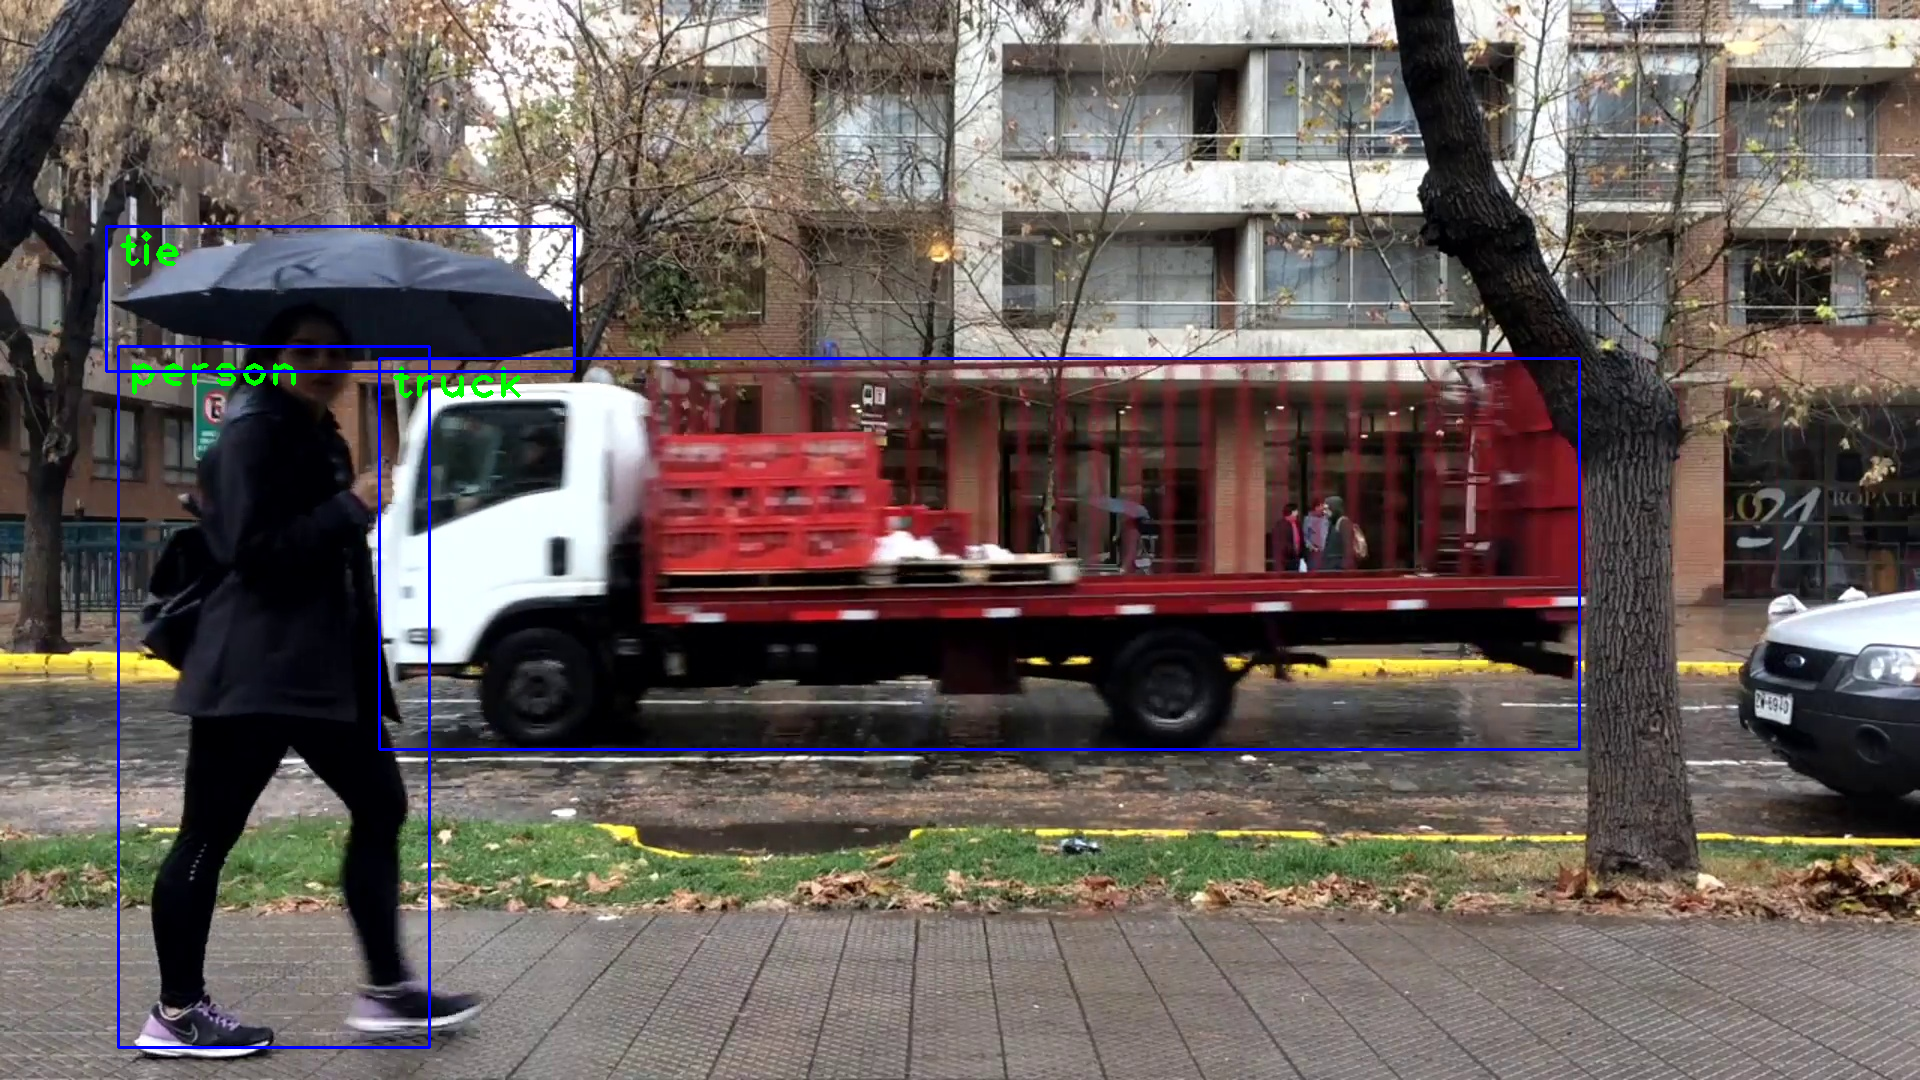

In [ ]:
# code cell 6
# detects the objects in the images with a threshold of 0.6

def detect_obj():
    config_file = "/content/drive/MyDrive/Colab Notebooks/cv/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
    frozen_model = "/content/drive/MyDrive/Colab Notebooks/cv/frozen_inference_graph.pb"

    model = cv2.dnn_DetectionModel(frozen_model, config_file)

    ClassLabels = []
    file_name = "/content/drive/MyDrive/Colab Notebooks/cv/labels.txt"
    with open (file_name, 'rt') as fpt:
        ClassLabels = fpt.read().rstrip("\n").split('\n')

    #ClassLabels

    model.setInputSize(320,320)
    model.setInputScale(1.0/127.5)
    model.setInputMean((127.5,127,127.5))
    model.setInputSwapRB(True)

    img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/cv/data1/frame4.jpg')
    img.shape

    ClassIndex, confidance, bbox =model.detect(img, confThreshold= 0.6)

    ClassIndex

    font_scale = 3
    k = 0
    font = cv2.FONT_HERSHEY_PLAIN
    for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidance.flatten(), bbox ):
        cv2.rectangle(img, boxes, (255,0,0), 2)
        cv2.putText(img, ClassLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color=(0,255,0), thickness= 3)

    cv2_imshow(img)
detect_obj()

In [ ]:
# code cell 7
cv2.imwrite("detected.jpg", img)

True

In [ ]:
# code cell 8
# smiti
# code to detect only objects that are closer to the user


# Load pre-trained object detection model
net = cv2.dnn.readNet("path_to_object_detection_model_weights", "path_to_object_detection_model_config")
classes = ["class1", "class2", ...]  # List of classes in the model
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# Load pre-trained depth estimation model
depth_model = cv2.dnn.readNet("path_to_depth_estimation_model_weights", "path_to_depth_estimation_model_config")

# Function to detect objects in the image
def detect_objects(image):
    # Object detection
    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # Process detections
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:  # Confidence threshold
                # Object detected
                # Perform further processing if needed (e.g., filtering based on class, bounding box extraction, etc.)
                pass
    return image

# Function to estimate depth
def estimate_depth(image):
    # Depth estimation
    # Perform depth estimation using depth_model
    # depth_map = depth_estimation_function(image)
    depth_map = np.random.rand(image.shape[0], image.shape[1])  # Placeholder random depth map for demonstration
    return depth_map

# Main function
def main():
    # Load image
    image = cv2.imread("path_to_image")

    # Detect objects
    detected_image = detect_objects(image)

    # Estimate depth
    depth_map = estimate_depth(image)

    # Combine depth and object detection
    # Filter objects based on depth information

    # Display results
    cv2.imshow("Detected Objects", detected_image)
    cv2.imshow("Depth Map", depth_map)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


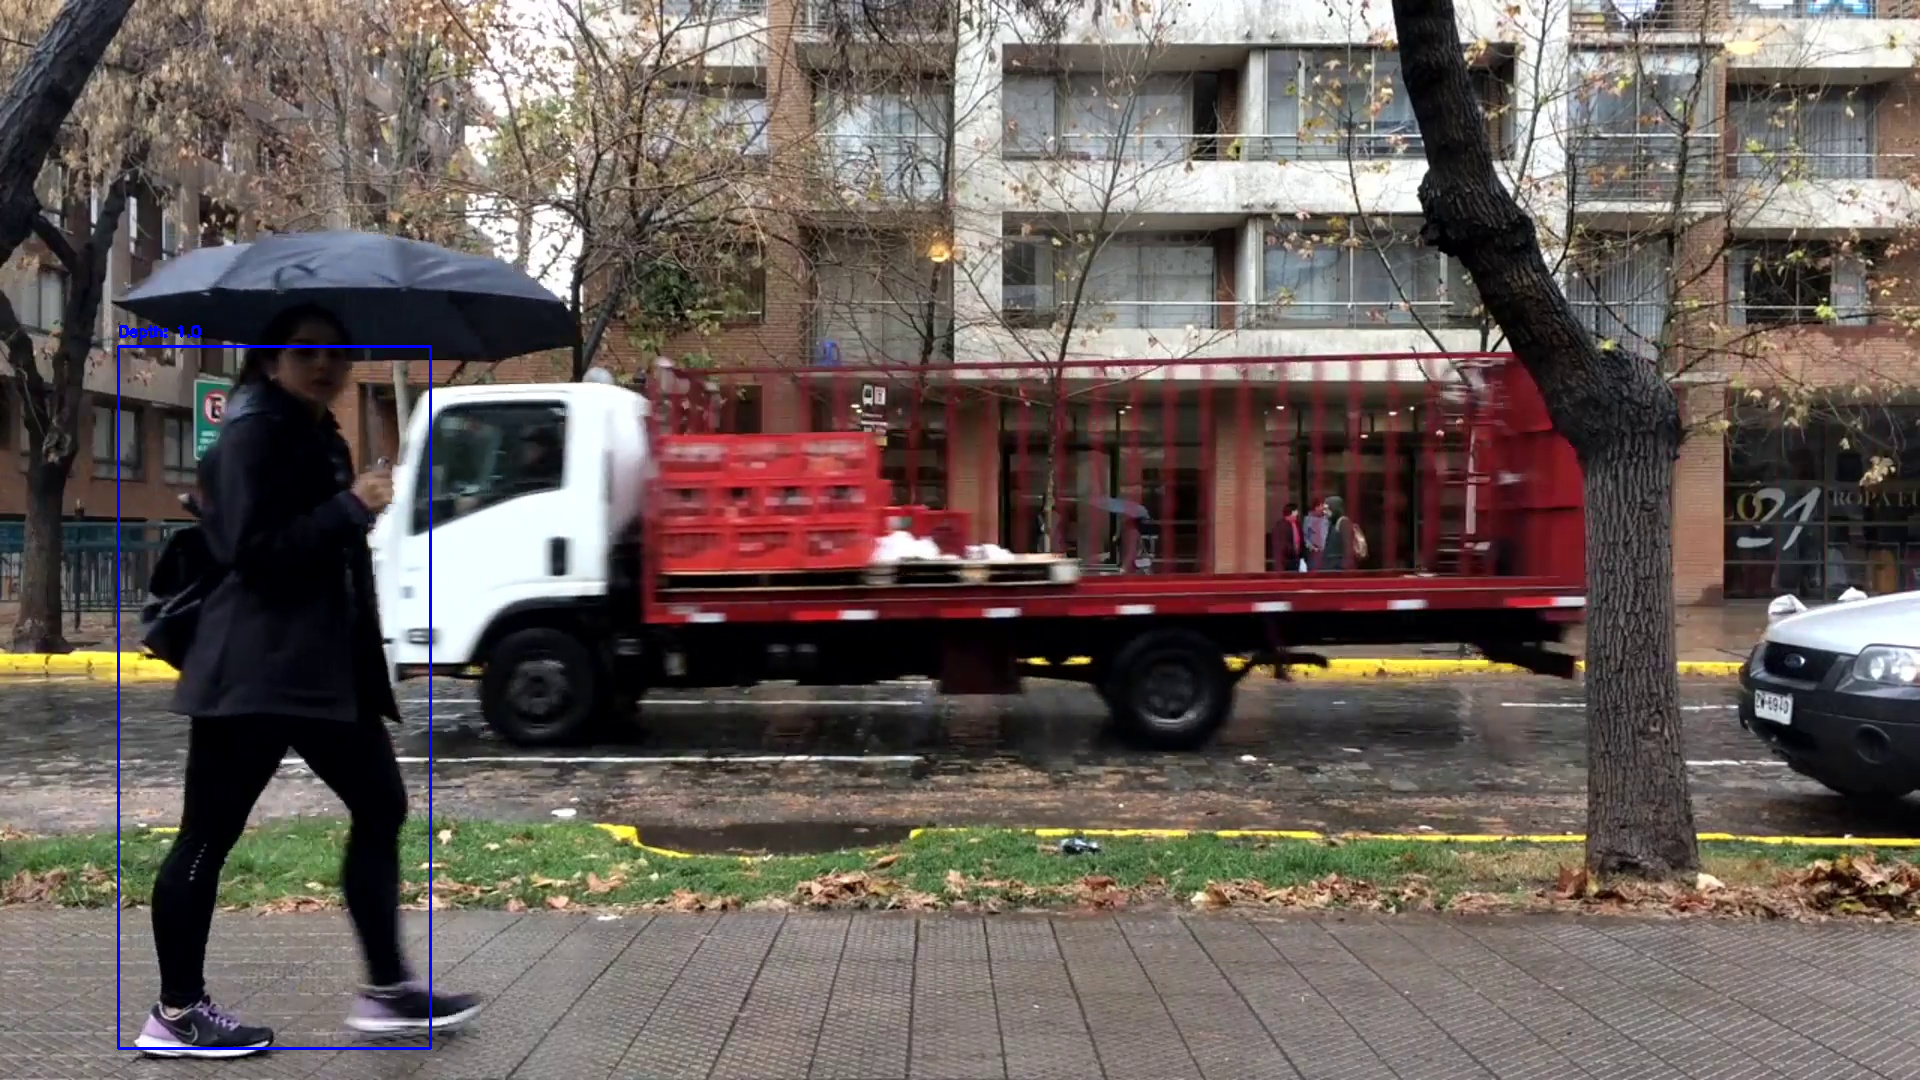

In [ ]:
# code cell 9
# smiti
# detects only objects that are closer to the user

# Load object detection model
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "frozen_inference_graph.pb"
model = cv2.dnn_DetectionModel(frozen_model, config_file)

# Load class labels
ClassLabels = []
file_name = "labels.txt"
with open(file_name, 'rt') as fpt:
    ClassLabels = fpt.read().rstrip("\n").split('\n')

# Set model parameters
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127, 127.5))
model.setInputSwapRB(True)

# Load image
img = cv2.imread('frame4.jpg')

# Perform object detection
ClassIndex, confidance, bbox = model.detect(img, confThreshold=0.6)

# Initialize list to store depths of objects
object_depths = []

# Calculate depth for each detected object
for box in bbox:
    # Extract coordinates of bounding box
    x, y, w, h = box

    # Calculate depth using a depth estimation method (e.g., stereo vision, depth from focus, etc.)
    # Here, we'll just assume a random depth for demonstration purposes
    depth = 1.0  # Example random depth

    # Store depth along with bounding box coordinates
    object_depths.append((x, y, w, h, depth))

# Sort objects based on depth (closest first)
object_depths.sort(key=lambda x: x[4])

# Display the closest object
closest_object = object_depths[0]
x, y, w, h, depth = closest_object
cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
cv2.putText(img, f"Depth: {depth}", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Display the image with the closest object detected
cv2_imshow(img)


In [ ]:
# code cell 10
os.makedirs('cropped')

In [5]:
# code cell 11
# divide detected images into different images for captioning


def img_to_parts(frame_path,j):
    # Load and display the original image
    print("frame_path: ",frame_path)
    img = cv2.imread(frame_path)
    # plt.imshow(img)
    # plt.show()

    # Detect objects in the image
    ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.6)

    if (not ClassIndex) or (not confidence) or (not bbox):
        return

    # Save detected parts as different images
    for i, (ClassInd, conf, boxes) in enumerate(zip(ClassIndex.flatten(), confidence.flatten(), bbox)):
        # Crop the detected part from the original image
        x, y, w, h = boxes
        detected_part = img[y:y+h, x:x+w]

        # Save the detected part as a separate image

        cv2.imwrite(f'/content/frame_dir/frame_{j}/detected_part_{i}.jpg', detected_part)

        # Display the cropped part
        # plt.imshow(detected_part)
        # plt.title(f'Detected Part {i}')
        # plt.show()


In [ ]:
# code cell 12
# code to caption the cropped images

In [ ]:
# code cell 13

img_dir = "/content/drive/MyDrive/Colab Notebooks/cv/cropped"
captioner = pipeline("image-to-text",model="Salesforce/blip-image-captioning-base")
img_desc = ""

for filename in os.listdir(img_dir):
    if filename.endswith(".jpg"):
        file_path = os.path.join(img_dir, filename)
        print("Found JPG file:", file_path)
        response = captioner(file_path)
        img_desc = img_desc + ", " + response[0]["generated_text"]


Found JPG file: /content/drive/MyDrive/Colab Notebooks/cv/cropped/detected_part_2.jpg


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Found JPG file: /content/drive/MyDrive/Colab Notebooks/cv/cropped/detected_part_1.jpg
Found JPG file: /content/drive/MyDrive/Colab Notebooks/cv/cropped/detected_part_0.jpg


In [ ]:
# code cell 14
print(img_desc)

, a woman walking down a street holding an umbrella, a truck is parked in the street, a woman is walking down the street with a bag


In [ ]:
# code cell 15
# convert text to speech


language = 'en'
myobj = gTTS(text=img_desc, lang=language, slow=False)

myobj.save("test1.mp3")
mp3_file_path = "test1.mp3"

os.system("mpg321 test1.mp3")



# Play the audio file
Audio(mp3_file_path)


In [ ]:
!pip install playsound

  Preparing metadata (setup.py) ... done
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7020 sha256=5ae9e3c3dbc867c9c300ee8af903106f3c7aac871575557682ea3bd8d0e9b9fc
  Stored in directory: /root/.cache/pip/wheels/90/89/ed/2d643f4226fc8c7c9156fc28abd8051e2d2c0de37ae51ac45c
Successfully built playsound


Image

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'

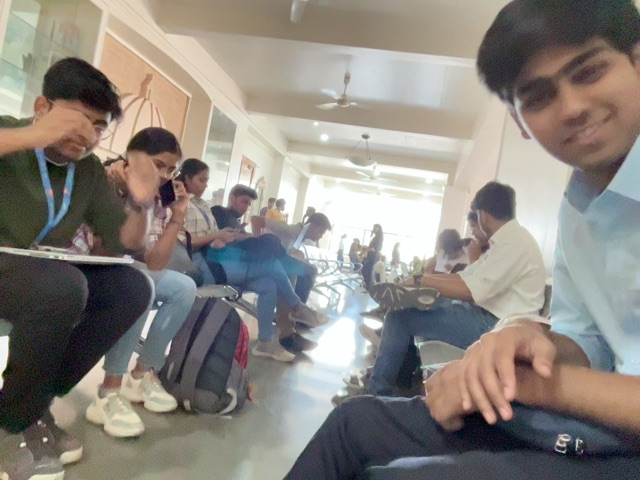

In [ ]:
cap_img = cv2.imread('/content/photo.jpg')
cv2_imshow(cap_img)

In [ ]:
captioner = pipeline("image-to-text",model="Salesforce/blip-image-captioning-base")
img_desc = ""

filename = "photo.jpg"

if filename.endswith(".jpg"):
    file_path = os.path.join('/content/', filename)
    print("Found JPG file:", file_path)
    response = captioner(file_path)
    img_desc = img_desc + ", " + response[0]["generated_text"]


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

Found JPG file: /content/photo.jpg


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [ ]:
language = 'en'
myobj = gTTS(text=img_desc, lang=language, slow=False)

myobj.save("test1.mp3")
mp3_file_path = "test1.mp3"

os.system("mpg321 test1.mp3")



# Play the audio file
Audio(mp3_file_path)


In [ ]:
# code cell 16
# main

video_path = "/content/drive/MyDrive/Colab Notebooks/cv/video2.mp4"
config_file = "/content/drive/MyDrive/Colab Notebooks/cv/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "/content/drive/MyDrive/Colab Notebooks/cv/frozen_inference_graph.pb"

model = cv2.dnn_DetectionModel(frozen_model, config_file)
# Load class labels
ClassLabels = []
file_name = "/content/drive/MyDrive/Colab Notebooks/cv/labels.txt"
with open(file_name, 'rt') as fpt:
    ClassLabels = fpt.read().rstrip("\n").split('\n')
os.makedirs('/content/frame_dir')

# Set model parameters
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127, 127.5))
model.setInputSwapRB(True)

captioner = pipeline("image-to-text",model="Salesforce/blip-image-captioning-base")
img_desc = ""

i=0
video_to_img(video_path) # creates /content/data/ folder in colab and stores frames in it
for frame_path in sorted(os.listdir('/content/data')):
    if frame_path.endswith(".jpg"):
        file_path = os.path.join('/content/data', frame_path)
        os.makedirs(f'/content/frame_dir/frame_{i}')
        img_to_parts(file_path,i)
        i+=1




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

Creating..../data/frame0.jpg
Creating..../data/frame1.jpg
Creating..../data/frame2.jpg
Creating..../data/frame3.jpg
Creating..../data/frame4.jpg
Creating..../data/frame5.jpg
Creating..../data/frame6.jpg
Creating..../data/frame7.jpg
frame_path:  /content/data/frame0.jpg


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
img_desc = ""

for framewise_dir in sorted(os.listdir('/content/frame_dir')):
    for cropped_img in sorted(os.listdir('/content/frame_dir/'+framewise_dir)):
        img_path = '/content/frame_dir/' + framewise_dir + '/' + cropped_img
        print(img_path)
        response = captioner(img_path)
        img_desc = img_desc + ", " + response[0]["generated_text"]

/content/frame_dir/frame_0/detected_part_0.jpg


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


/content/frame_dir/frame_0/detected_part_1.jpg


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


/content/frame_dir/frame_0/detected_part_2.jpg
/content/frame_dir/frame_1/detected_part_0.jpg
/content/frame_dir/frame_1/detected_part_1.jpg
/content/frame_dir/frame_1/detected_part_2.jpg
/content/frame_dir/frame_2/detected_part_0.jpg
/content/frame_dir/frame_2/detected_part_1.jpg
/content/frame_dir/frame_2/detected_part_2.jpg
/content/frame_dir/frame_3/detected_part_0.jpg
/content/frame_dir/frame_3/detected_part_1.jpg
/content/frame_dir/frame_3/detected_part_2.jpg
/content/frame_dir/frame_3/detected_part_3.jpg
/content/frame_dir/frame_3/detected_part_4.jpg
/content/frame_dir/frame_4/detected_part_0.jpg
/content/frame_dir/frame_4/detected_part_1.jpg
/content/frame_dir/frame_5/detected_part_0.jpg
/content/frame_dir/frame_5/detected_part_1.jpg
/content/frame_dir/frame_5/detected_part_2.jpg
/content/frame_dir/frame_5/detected_part_3.jpg
/content/frame_dir/frame_6/detected_part_0.jpg
/content/frame_dir/frame_7/detected_part_0.jpg


In [ ]:
shutil.rmtree('/content/frame_dir')


Live Video Input


In [6]:
from IPython.display import display, Javascript
from base64 import b64decode

def record_video(filename='video.mp4'):
  js = Javascript('''
    async function recordVideo() {
      const div = document.createElement('div');

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({ video: true });

      const recorder = new MediaRecorder(stream);
      const chunks = [];

      recorder.ondataavailable = (e) => chunks.push(e.data);
      recorder.onstop = (e) => {
        const blob = new Blob(chunks, { type: 'video/mp4' });
        const url = URL.createObjectURL(blob);
        const a = document.createElement('a');
        a.href = url;
        a.download = 'video.mp4';
        document.body.appendChild(a);
        a.click();
        setTimeout(() => {
          document.body.removeChild(a);
          URL.revokeObjectURL(url);
        }, 100);
      };

      document.body.appendChild(video);
      video.srcObject = stream;
      await video.play();

      const stopButton = document.createElement('button');
      stopButton.textContent = 'Stop Recording';
      div.appendChild(stopButton);
      document.body.appendChild(div);

      recorder.start();

      // Stop recording when the stop button is clicked
      await new Promise((resolve) => stopButton.onclick = () => {
        recorder.stop();
        stream.getVideoTracks()[0].stop();
        resolve();
      });
    }
    recordVideo();
  ''')
  display(js)

record_video()

<IPython.core.display.Javascript object>